# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [14]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

In [15]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Utiliza-se 'print(df['Categoria'].dtype)' para descobrir tipo de dado das colunas


- O dataframe inicialmente possuia alguns dos dados de preços
com valor 0 e foram identificados 3 cenários. Por não ser um
valor plausível para a análise de preços, foram realizadas
algumas alterações nesses dados zerados:
  1. O primeiro cenário apresentavam os dados de Preco_Desconto,
  Preco_Anterior e Desconto com valores, porém Preco_Normal
  estava atribuído 0. Para contornar esta situação, o
  Preco_Normal zerado foi substituído pelo valor de
  Preço_Anterior, corrigindo este cenário de maneira precisa.
  2. Para o segundo cenário, todos os campos citados acima
  estavam com valor 0 atribuídos a eles. Como solução, foi
  implementada uma inserção de preços baseado nas médias de
  preço de cada categoria e atualizadas no campo Preco_Normal.
  3. Por fim, no último cenário, dos quatro mesmos campos
  citados anteriormente, apenas o valor de Preco_Desconto
  apresenta-se preenchido com valores, indicando que havia
  algum desconto atribuído àquele produto. Para solucionar este
  problema, o campo Desconto zerado foi preenchido com a média
  de descontos por Categoria. Em seguida, a soma dos dois campos
  resultou no valor original do produto, e assim foi inserido
  seu total no Preco_Normal também zerado.

In [16]:
# Substituindo Preco_Normal = 0 pela média do mesmo por categoria
media_preco_vazio = df.groupby('Categoria')['Preco_Normal'].mean().to_dict()  # Utiliza-se 'to_dict()' para tornar os dados legíveis para lambda na linha abaixo
df['Preco_Normal'] = df.apply(lambda x: media_preco_vazio[x['Categoria']] if x['Preco_Desconto'] == 0 and x['Preco_Normal'] ==0 else x['Preco_Normal'], axis=1)
df['Preco_Normal'] = df['Preco_Normal'].astype(int)

# Substituindo Preco_Normal = 0 pela soma da média de Desconto (gerada por categoria) e do Preco_Desconto
media_desc_vazio = df.groupby('Categoria')['Desconto'].mean().to_dict()
df['Desconto'] = df.apply(lambda x: media_desc_vazio[x['Categoria']] if x['Preco_Desconto'] != 0 and x['Preco_Normal'] == 0 else x['Desconto'], axis=1)
df['Desconto'] = df['Desconto'].astype(int)
df['Preco_Normal'] = df.apply(lambda x: x['Desconto'] + x['Preco_Desconto'] if x['Preco_Normal'] == 0 else x['Preco_Normal'], axis=1)
#print(df.iloc[813:].to_string()) - Verificam-se as linhas que apresentavam Preco_Normal = 0


# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [17]:
# Trazendo a média e a mediana de Preco_Normal por categoria de produto.
#Trazendo Média
media_preco_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by= 'Categoria', ascending=False)
print('\n\nMédias dos preços por categoria de produto:\n', media_preco_categoria)




Médias dos preços por categoria de produto:
                     Categoria  Preco_Normal
6                    verduras   1448.218750
5                     lacteos   2684.174497
4        instantaneos-y-sopas    936.789474
3                      frutas   1724.473684
2                  congelados   3084.353191
1          comidas-preparadas   3988.869565
0  belleza-y-cuidado-personal   2959.146444


In [18]:
#Trazendo Mediana
mediana_preco_categoria = df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Categoria',ascending=False)
print('\nMedianas dos preços por categoria de produto:\n', mediana_preco_categoria)



Medianas dos preços por categoria de produto:
                     Categoria  Preco_Normal
6                    verduras        1321.0
5                     lacteos        1606.0
4        instantaneos-y-sopas         579.0
3                      frutas        1195.0
2                  congelados        3059.0
1          comidas-preparadas        3590.0
0  belleza-y-cuidado-personal        2599.0


- Podemos observar em seu output que, Frutas e principalmente os
Lácteos possuem médias muito acima das medianas apresentadas,
indicando a presença de outliers nos preços, que aumentam
significativamente os valores da média dessas categorias.
- Já as demais categorias possuem variações não muito distantes,
acima dos valores das medianas. Isso indica que não há valores
discrepantes e pouca oscilação entre os preços dos produtos de
mesma categoria.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [19]:
# Trazendo o desvio padrão por Categoria de produto.
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Categoria',ascending=False)
print('\nDesvio Padrão por Categoria de Produto\n', desvio_padrao_por_categoria)


Desvio Padrão por Categoria de Produto
                     Categoria  Preco_Normal
6                    verduras    933.363358
5                     lacteos   3853.734361
4        instantaneos-y-sopas   1079.633912
3                      frutas   1639.151114
2                  congelados   1735.837131
1          comidas-preparadas   1311.572654
0  belleza-y-cuidado-personal   2043.226971


- Segundo os valores, podemos compreender que apesar de haver
um desvio enorme na categoria Lácteos, a categoria Frutas não
apresenta desvio exacerbado em comparação à primeira categoria.
- Isso pode indicar que, a categoria de Lácteos, além de possuir
outliers já indicados na média e mediana, insinua também que
estes tem preços extremamente acima dos demais acerca da média,
afetando o resultado dela e do próprio desvio, enquanto a
categoria Frutas possui uma quantidade não tão alta de preços
dispersos.
- É importante notar também, que existe um desvio padrão elevado
das categorias Beleza/cuidado pessoal e Verduras. Isso pode
ocorrer devido à distribuição mais uniforme de preços em torno
da média e mediana, indicando que não há outliers e que existe
apenas uma faixa mais ampla nos preços em ambas as categorias.


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

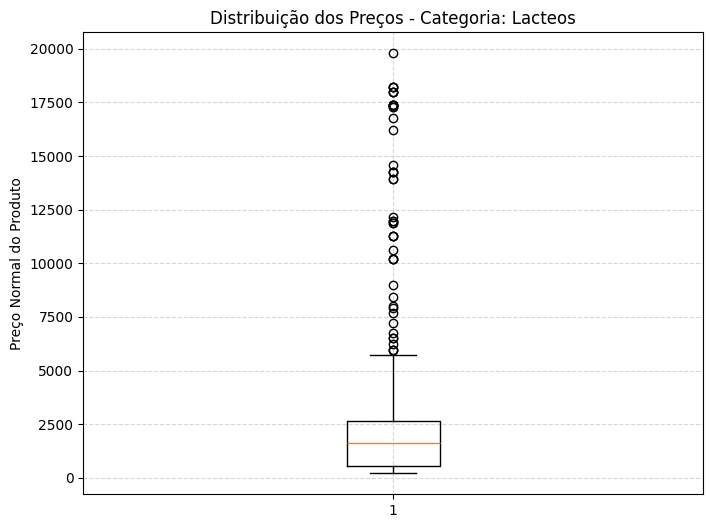

In [21]:
# Boxplot da distribuição do Preco_Normal da categoria com maior desvio padrão.
# Separando por categoria específica
df_categ = df.loc[df['Categoria'] == 'lacteos']

# Plot do Boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df_categ['Preco_Normal'])
plt.title('Distribuição dos Preços - Categoria: Lacteos')
plt.ylabel('Preço Normal do Produto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- A categoria de Lácteos foi selecionada para a análise do
Boxplot, pois a mesma apresenta um maior desvio padrão.
- A distribuição dos dados está mais concentrada aproximadamente
entre os preços 560 e 2640 Pesos Chilenos. Entre estes valores,
a mediana do preço desses produtos encontra-se em torno de
1600 CLP. Os valores máximo e mínimo que um produto desta
categoria pode chegar são, respectivamente, 5719 e 209 CLP.
- É possível observar uma quantidade considerável de outliers
acima dos demais dados no gráfico, confirmando assim que existem
preços muito exacerbados para esta categoria, o que desencadeou
na grande alteração da média em relação à mediana e no desvio
padrão.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

In [20]:
# Gráfico de barras da média de descontos por categoria.
# Média de descontos
df_media_desc = df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by= 'Desconto', ascending=False)

fig= px.bar(df_media_desc, x = 'Categoria', y = 'Desconto', orientation = 'v', title = 'Média de Descontos por Categoria',
        labels={'Categoria':'Tipo de Produto', 'Desconto':'Média de Desconto'})
fig.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [22]:
# Gráfico interativo agrupando os dados por categoria, marca e trazendo média de descontos.
df_media_desc_categ = df.groupby(['Categoria','Marca'])['Desconto'].mean().reset_index().round(2)

fig = px.sunburst(df_media_desc_categ, path=['Categoria', 'Desconto', 'Marca'], values=None, color='Categoria',
                  title='Relação entre Marcas, Categoria de Produto e Média de Desconto')
fig.show()